In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

Assume $y = 0.5 \cdot x + 1 + \epsilon$, where $\epsilon \sim N\left(0, 0.5^2\right)$. We generate $n$ training examples by sampling $x$ uniformly from $[2, 4)$.

In [2]:
n = 200
x = 2 * np.random.rand(n, 1) + 2

a = 0.5
b = 1
sigma = 0.5
y = a * x + b + sigma * np.random.randn(n, 1)

We center both the features and the labels of the training set. Then we fit a ridge regression model with $\lambda = 10^{-3}$. The model has only a single scalar variable $w_1$. Note that for one-dimensional data, it is easy to solve for $w_1$. However, we still call NumPy's [least-squares solver](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.linalg.lstsq.html) so that the code can generalize to multi-dimensional feature vectors. Once we have $w_1$, it is trivial to compute $w_0$: $w_0 = \bar{y} - w_1 \bar{x}$.

In [3]:
xc = x - x.mean()
yc = y - y.mean()

m = xc.shape[1]
a = np.matmul(xc.T, xc) + n * 1e-3 * np.identity(m)
b = np.matmul(xc.T, yc)
w = np.linalg.lstsq(a, b)[0]
w1 = w[0][0]
w0 = y.mean() - w1 * x.mean()

delta = 0.3
x1 = np.array([xc.min() - delta, xc.max() + delta])
y1 = w1 * x1
x2 = np.array([x.min() - delta, x.max() + delta])
y2 = w1 * x2 + w0

Below we plot both the original and the centered training sets along with their fitted ridge regression models.

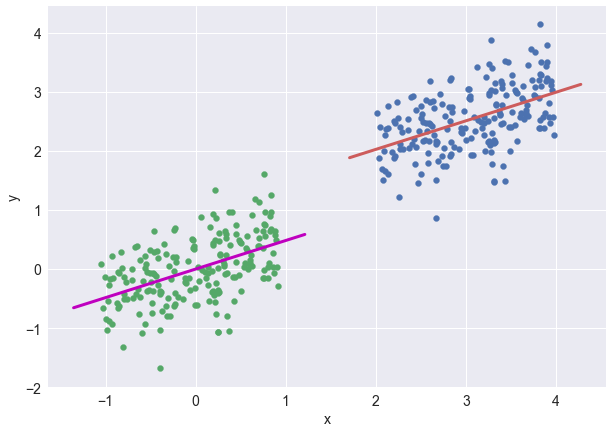

In [4]:
plt.figure(figsize=(10, 7))
plt.tick_params(labelsize=14)
plt.scatter(x, y, s=36)
plt.scatter(xc, yc, s=36)
plt.plot(x1, y1, 'm', x2, y2, 'indianred', linewidth=3)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()